<a href="https://colab.research.google.com/github/faradishaldina/statkomp/blob/main/07_FaradishaA_Kuis2StatKomp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Mean of CP for Pokemons fire type is 281,67 while the standard deviation is 323,07. If the CP value is assumed as normally distributed, what is the probability of 100 Pokemons fire type have CP value below 290?

In [6]:
import scipy.stats as stats

mean = 281.67
std_dev = 323.07
sample_size = 100
cp_value = 290

# Calculate the standard error
# Since we want to find the probability of 100 Pokemon having a CP value below 290, 
# we use an approximate binomial distribution with p = 0.5095 and n = 100:
se = std_dev / (sample_size ** 0.5)

# Calculate the z-score
z_score = (cp_value - mean) / se

# Calculate the probability using the cumulative distribution function (CDF)
probability = stats.norm.cdf(z_score)

# Print the result
print("Standart Error : ", se)
print("Z Score : ", z_score)
print("The probability of 100 Fire-type Pokémon having a CP value below 290 is:", probability)

Standart Error :  32.307
Z Score :  0.2578388584517282
The probability of 100 Fire-type Pokémon having a CP value below 290 is: 0.6017343632782693


2. Suppose the caught pokemons have variance of HP is 1948,24. By choosing 25 pokemons randomly, the mean is 53,56. Determine the range of population average from the HP by using confidential level is 95%.

In [38]:
import scipy.stats as stats
import math

sample_mean = 53.56
sample_std = math.sqrt(1948.24)
sample_size = 25
confidence_level = 0.95

# Calculate the critical value (t*) using the t-distribution
degrees_of_freedom = sample_size - 1
critical_value = stats.t.ppf((1 + confidence_level) / 2, df=degrees_of_freedom)

# Calculate the margin of error
margin_of_error = critical_value * (sample_std / math.sqrt(sample_size))

# Calculate the confidence interval
confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)
print("Margin of Error :", margin_of_error)

# Calculate the lower and upper bounds of the confidence interval
lower_bound = sample_mean - margin_of_error
upper_bound = sample_mean + margin_of_error

print("Range of population mean (95% confidence level):", confidence_interval)
print("Lower bound:", lower_bound)
print("Upper bound:", upper_bound)

Margin of Error : 18.21963078632054
Range of population mean (95% confidence level): (35.340369213679466, 71.77963078632054)
Lower bound: 35.340369213679466
Upper bound: 71.77963078632054


In [40]:
sample_mean = 53.56
population_variance = 1948.24
sample_size = 25
confidence_level = 0.95

# Calculate the standard error
standard_error = math.sqrt(population_variance / sample_size)

# Find the critical value (z-score) for the confidence level
z = 1.96  # For a 95% confidence level (standard normal distribution)

# Calculate the margin of error
margin_of_error = z * standard_error

# Calculate the lower and upper bounds of the confidence interval
lower_bound = sample_mean - margin_of_error
upper_bound = sample_mean + margin_of_error

print("Range of population mean (95% confidence level):")
print("Lower bound:", lower_bound)
print("Upper bound:", upper_bound)

Range of population mean (95% confidence level):
Lower bound: 36.25756227117115
Upper bound: 70.86243772882885


3. Check the Pokemon data!

a. Determine the standard deviation of caught Pokemon! (5 poin)

b. Determine the standard deviation of flee Pokemon! (5 poin)

c. Are the caught Pokemon and flee Pokemon groups homogen? Use Harley testing to justify your answer. (10 poin)

In [41]:
import pandas as pd
import numpy as np

# Read the CSV file
data = pd.read_csv('Pokemon (2).csv')

# Extract the column with the words
# word_column = data['column_name']
Caught_status = data['status']
Flee_status = data['status']

# Calculate the length of each word
# word_lengths = word_column.str.len()
Caught_lengths = Caught_status.str.len()
Flee_lengths = Flee_status.str.len()

# Calculate the standard deviation
std_devCaught = np.std(Caught_lengths)
std_devFlee = np.std(Flee_lengths)
harley_test = std_devCaught / std_devFlee

# Print the result
print('a. Standard Deviation of Caught:', std_devCaught)
print('b. Standard Deviation of Flee:', std_devFlee)
print('c. Result of Harley Test:', harley_test)


a. Standard Deviation of Caught: 0.3047025760256497
b. Standard Deviation of Flee: 0.3047025760256497
c. Result of Harley Test: 1.0


By using Pokemon data which caught from March 15th to March 22nd 2023, perform several activities, such:

a. Use KS test to determine whether “Attack” attribute is normally distributed by using p-value = 0.05. Justify your answer by writing the calculation process! (10 poin)

b. Make a histogram of “Attack” to justify your answer at point a! (5 poin)

c. Use KS test to determine “Defence” is normally distributed or not by using confidential level = 99%. Justify your answer by writing the calculation process! (10 poin)

d. Make a histogram of “Defence” to justify your answer at point c! (5 poin)

a. The 'Attack' attribute is not normally distributed.
b. Histogram of Attack Attribute 


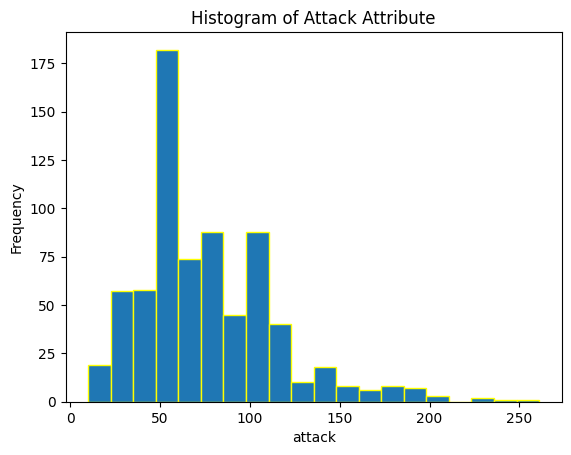

c. The 'Defense' attribute is not normally distributed.
d. Histogram of Defense Attribute


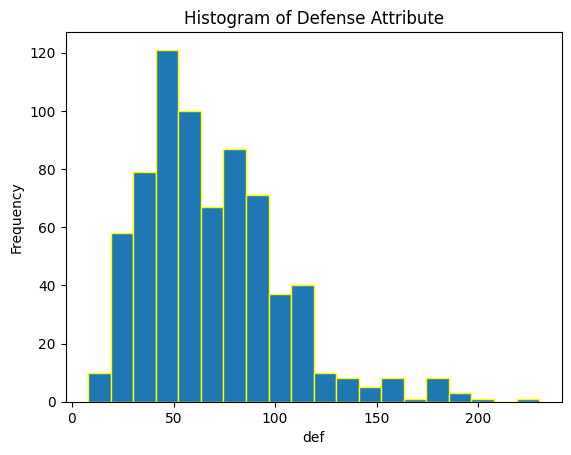

In [42]:
from scipy.stats import kstest, norm
import matplotlib.pyplot as plt

data = pd.read_csv('Pokemon (2).csv')

attack_values = data['attack']

_, p = kstest(attack_values, 'norm')
a = 0.05
if p < a:
    print("a. The 'Attack' attribute is not normally distributed.")
else:
    print("a. The 'Attack' attribute is normally distributed.")

print("b. Histogram of Attack Attribute ")
plt.hist(attack_values, bins=20, edgecolor='yellow')
plt.xlabel('attack')
plt.ylabel('Frequency')
plt.title('Histogram of Attack Attribute')
plt.show()

defense_values = data['def']

_, p = kstest(defense_values, 'norm')
a = 0.01  # 99% confidence level

if p < a:
    print("c. The 'Defense' attribute is not normally distributed.")
else:
    print("c. The 'Defense' attribute is normally distributed.")
print ("d. Histogram of Defense Attribute")
plt.hist(defense_values, bins=20, edgecolor='yellow')
plt.xlabel('def')
plt.ylabel('Frequency')
plt.title('Histogram of Defense Attribute')
plt.show()